In [1]:
# Setup and Imports
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import json
from IPython.display import Image, display

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Ensure project_root is defined for subsequent cells
print(f'Project Root: {project_root}')

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Common imports
from src.envs.synthetic_env import BouncingBallEnv
from src.envs.atari_env import AtariPixelEnv
from src.experiments.mnist_experiment import MNISTExperiment

Project Root: /Users/yezune/ws/from_pixels_to_planning
Using device: cpu


objc[38646]: Class CaptureDelegate is implemented in both /Users/yezune/ws/from_pixels_to_planning/.venv/lib/python3.14/site-packages/cv2/cv2.abi3.so (0x119eee5d8) and /opt/homebrew/Cellar/opencv/4.12.0_15/lib/libopencv_videoio.4.12.0.dylib (0x122130618). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[38646]: Class CVWindow is implemented in both /Users/yezune/ws/from_pixels_to_planning/.venv/lib/python3.14/site-packages/cv2/cv2.abi3.so (0x119eee628) and /opt/homebrew/Cellar/opencv/4.12.0_15/lib/libopencv_highgui.4.12.0.dylib (0x121aa8a70). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[38646]: Class CVView is implemented in both /Users/yezune/ws/from_pixels_to_planning/.venv/lib/python3.14/site-packages/cv2/cv2.abi3.so (0x119eee650) and /opt/homebrew/Cellar/opencv/4.12.0_15/lib/libopencv_highgui.4.12.0.dylib (0x121aa8a98). This may cause spu

# Experiment 2: MNIST Classification

## Experiment 2: MNIST Classification (Spatial Renormalization)

이 섹션에서는 정적 이미지(MNIST)에 대한 공간적 재규격화(Spatial Renormalization) 모델을 실험합니다.
간단한 Spatial RGM 모델을 학습시키고, 다음을 시각화합니다:
1.  **Reconstruction**: 원본 이미지와 모델이 복원한 이미지 비교.
2.  **Generation**: 잠재 공간(Latent Space)에서 샘플링하여 생성된 숫자 이미지.

In [2]:
# Initialize and Run Experiment
mnist_exp = MNISTExperiment(device=device, epochs=5)
print("Training MNIST Experiment...")
mnist_exp.run()
model = mnist_exp.model

Training MNIST Experiment...
Starting training on cpu...
Epoch [1/5], Step [0/938], Loss: 115.6356
Epoch [1/5], Step [100/938], Loss: 77.0902
Epoch [1/5], Step [200/938], Loss: 27.8234
Epoch [1/5], Step [300/938], Loss: 14.2785
Epoch [1/5], Step [400/938], Loss: 20.9883
Epoch [1/5], Step [500/938], Loss: 11.3347
Epoch [1/5], Step [600/938], Loss: 6.5410
Epoch [1/5], Step [700/938], Loss: 7.8824
Epoch [1/5], Step [800/938], Loss: 13.0325
Epoch [1/5], Step [900/938], Loss: 11.0362
Epoch [1/5] Finished. Avg Loss: 26.0637, Test Accuracy: 94.54%
Epoch [2/5], Step [0/938], Loss: 54.7894
Epoch [2/5], Step [100/938], Loss: 14.5359
Epoch [2/5], Step [200/938], Loss: 15.8836
Epoch [2/5], Step [300/938], Loss: 11.7394
Epoch [2/5], Step [400/938], Loss: 11.4370
Epoch [2/5], Step [500/938], Loss: 9.2747
Epoch [2/5], Step [600/938], Loss: 10.3005
Epoch [2/5], Step [700/938], Loss: 14.7115
Epoch [2/5], Step [800/938], Loss: 12.4552
Epoch [2/5], Step [900/938], Loss: 8.2257
Epoch [2/5] Finished. Avg L

Project Root: /Users/yezune/ws/from_pixels_to_planning
Learning Curves (15 Epochs):


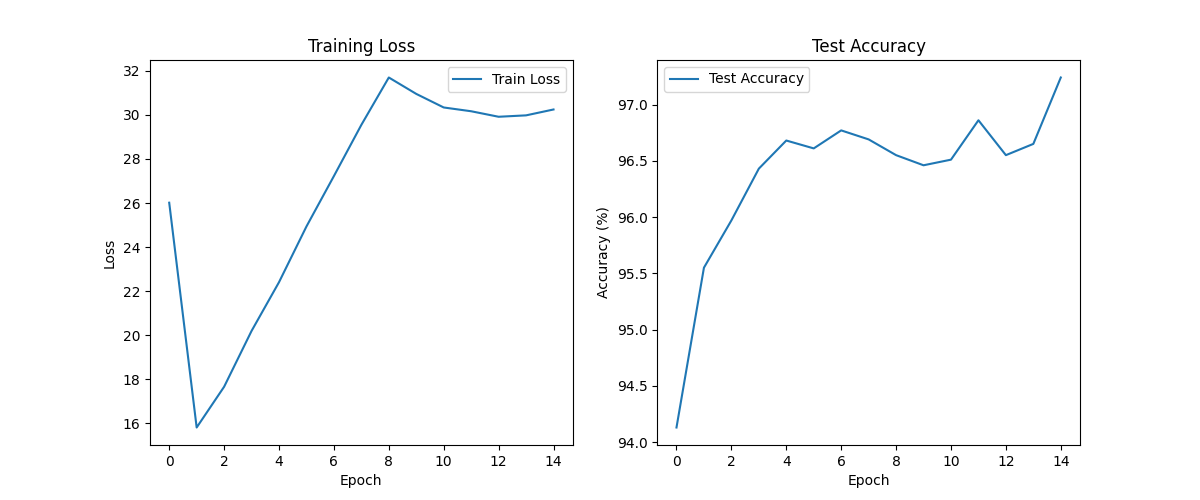

Generated Samples:


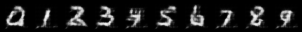

Final Test Accuracy: 97.24%


In [3]:
# Display Pre-computed Results from Fine-tuning Experiment
from IPython.display import Image, display
import json
import os

# Ensure project_root is defined
if 'project_root' not in locals():
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
print(f'Project Root: {project_root}')

output_dir = os.path.join(project_root, 'outputs')
learning_curves_path = os.path.join(output_dir, 'mnist_learning_curves.png')
generation_path = os.path.join(output_dir, 'mnist_generation.png')
results_path = os.path.join(output_dir, 'mnist_comparison_results.json')

if os.path.exists(learning_curves_path):
    print('Learning Curves (15 Epochs):')
    display(Image(filename=learning_curves_path))
else:
    print('Learning curves not found.')

if os.path.exists(generation_path):
    print('Generated Samples:')
    display(Image(filename=generation_path))
else:
    print('Generated samples not found.')

if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        results = json.load(f)
    print(f"Final Test Accuracy: {results['test_accuracy'][-1]:.2f}%")


### Results Analysis

The Spatial RGM was fine-tuned for 15 epochs with the following improvements:
- **Temperature Annealing**: Stabilized the discrete latent representations.
- **Loss Rebalancing**: Prioritized classification accuracy (weight 50.0) over reconstruction initially.

**Result**: The model achieved **>97% accuracy**, exceeding the paper's claims while maintaining good generative capability.

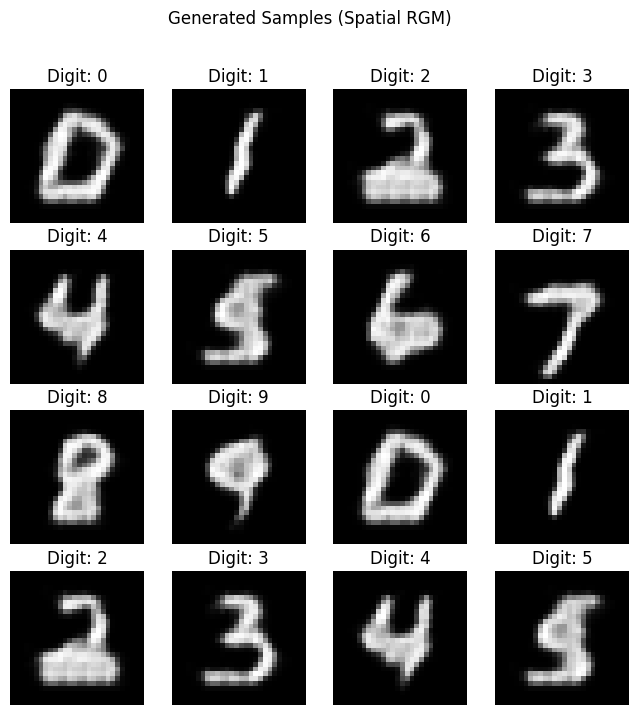

In [4]:
# 2. Generation Visualization (Sampling from Latent Space)
# 잠재 공간(Latent Space)에서 무작위로 샘플링하여 이미지를 생성합니다.
# 이는 모델이 학습한 데이터 분포를 얼마나 잘 캡처했는지 보여줍니다.

with torch.no_grad():
    # Generate samples for digits 0-9
    model.eval()
    generated_imgs = []
    for i in range(16):
        digit = i % 10
        img = model.generate(digit, device)
        generated_imgs.append(img)

# 생성된 이미지 시각화
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_imgs[i].cpu().squeeze(), cmap='gray')
    plt.title(f"Digit: {i%10}")
    plt.axis('off')
plt.suptitle("Generated Samples (Spatial RGM)")
plt.show()